# Project: Wrangling and Analyze Data

In [1]:
#Importing the necessary modules for the project
import pandas as pd
import numpy as np
import requests
import tweepy as tweepy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import json
from tweepy.parsers import JSONParser
import time
from datetime import datetime
import re
import os

## Data Gathering
In the section, we gather all three pieces of data for this project and load them in the notebook.

In [2]:
#Reading the twitter_archive_enhanced.csv data

data_twitter = pd.read_csv('twitter-archive-enhanced-2.csv')
data_twitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# Gathering and reading the image predictions from Udacity's servers
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(os.path.join('image_predictions.tsv'), mode = 'wb') as file:
    file.write(response.content) # Save the requested image predictions
    
image_pred = pd.read_csv('image_predictions.tsv', sep = '\t')#Reading the image.tsv file into a pandas dataframe
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. The Twitter API (tweet_json.txt) could not be queried with due to Credentialing Issues

In [4]:
# Due to Twitter API Credentialing Issues, the tweet_json.txt was used.
tweet_data = []
with open('tweet-json', 'r', encoding='utf8') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_data.append({
            'tweet_id': tweet['id'],
            'favorites': tweet['favorite_count'],
            'retweets': tweet['retweet_count']})

tweetFrom_API = pd.DataFrame(tweet_data)

In [5]:
tweetFrom_API.head()

,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


## Assessing Data

In this section, I detected and documented eight (8) quality issues and two (2) tidiness 



## Assessment [Twitter-Archive-Enhanced]- data_twitter

In [6]:
data_twitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [7]:
data_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
#checking samples of the data
data_twitter.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
690,787397959788929025,NaN,NaN,2016-10-15 21:01:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Moose. He's rather h*ckin dangerous (y...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/787397959...,11,10,Moose,None,None,None,None
275,840696689258311684,NaN,NaN,2017-03-11 22:51:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I didn't even have to intervene. Took him 4 mi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/840696689...,10,10,None,None,None,None,None
85,876120275196170240,NaN,NaN,2017-06-17 16:52:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Venti, a seemingly caffeinated puppoccino...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/876120275...,13,10,Venti,None,None,None,None
957,751538714308972544,NaN,NaN,2016-07-08 22:09:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Max. She has one ear that's always sli...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751538714...,10,10,Max,None,None,None,None
497,813142292504645637,NaN,NaN,2016-12-25 22:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Everybody stop what you're doing and look at t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813142292...,13,10,None,None,None,None,None
2115,670428280563085312,NaN,NaN,2015-11-28 02:25:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Willy. He's millennial af. 11/10 https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670428280...,11,10,Willy,None,None,None,None
351,831322785565769729,NaN,NaN,2017-02-14 02:02:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pete. He has no eyes. Needs a guide do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/831322785...,12,10,Pete,doggo,None,None,None
1764,678424312106393600,NaN,NaN,2015-12-20 03:58:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Crystal. She's a shitty fireman. No se...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678424312...,2,10,Crystal,None,None,None,None
1860,675489971617296384,NaN,NaN,2015-12-12 01:38:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT until we find this dog. Clearly a cool dog ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675489971...,10,10,None,None,None,None,None
2263,667544320556335104,NaN,NaN,2015-11-20 03:25:43 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Kial. Kial is either wearing a cape, w...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/667544320...,10,10,Kial,None,None,None,None


In [9]:
data_twitter.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [10]:
#Checking null values in the expanded_urls column
data_twitter['expanded_urls'].isnull().sum()

59

In [11]:
# Value Counting the name column values
data_twitter['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [12]:
# Counting the values in the 'rating _numerator' column
data_twitter['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [13]:
# Counting the values in the 'rating _numerator' column
data_twitter['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [14]:
#Descriptives
data_twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
# Checking for duplicates
data_twitter.duplicated().sum()

0

## Assessment - Assessment [image_predictions.tsv] - image_pred

In [16]:
# Check samples of samples images prediction data
image_pred.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
487,675501075957489664,https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg,1,dough,0.806757,False,bakery,0.027907,False,French_loaf,0.018189,False
1990,873213775632977920,https://pbs.twimg.com/media/DB5HTBGXUAE0TiK.jpg,1,vizsla,0.619782,True,bloodhound,0.338069,True,Chesapeake_Bay_retriever,0.012676,True
672,683142553609318400,https://pbs.twimg.com/media/CXsChyjW8AQJ16C.jpg,1,Leonberg,0.605851,True,chow,0.183470,True,German_shepherd,0.079662,True
827,693486665285931008,https://pbs.twimg.com/ext_tw_video_thumb/69348...,1,sea_lion,0.519811,False,Siamese_cat,0.290971,False,black-footed_ferret,0.039967,False
334,672169685991993344,https://pbs.twimg.com/media/CVQGv-vUwAEUjCj.jpg,1,cocker_spaniel,0.991011,True,Sussex_spaniel,0.004032,True,miniature_poodle,0.001276,True
1216,743545585370791937,https://pbs.twimg.com/media/ClGawiUWAAAgs0w.jpg,2,rapeseed,0.876875,False,standard_poodle,0.060583,True,Great_Pyrenees,0.033006,True
1265,749317047558017024,https://pbs.twimg.com/ext_tw_video_thumb/74931...,1,wire-haired_fox_terrier,0.155144,True,Lakeland_terrier,0.108382,True,buckeye,0.074617,False
389,673359818736984064,https://pbs.twimg.com/media/CVhBLohWEAAXtYl.jpg,1,English_setter,0.696568,True,Brittany_spaniel,0.104046,True,Ibizan_hound,0.034832,True
1348,759557299618865152,https://pbs.twimg.com/media/Cop9VVUXgAAhX9u.jpg,2,golden_retriever,0.763333,True,Chesapeake_Bay_retriever,0.194251,True,Labrador_retriever,0.012225,True
593,679475951516934144,https://pbs.twimg.com/media/CW37xZbUoAAUXe5.jpg,1,Maltese_dog,0.145742,True,toy_poodle,0.139407,True,West_Highland_white_terrier,0.108821,True


In [17]:
#Value count the P1 values
image_pred.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [18]:
# desrcibe the image prediction data
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [19]:
#checking the data information
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
#Checking the null values
image_pred.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [21]:
#checking for duplicates
image_pred.duplicated().sum()

0

## Assessment - Assessment [tweetFrom_API] - tweetFrom_API

In [22]:
#Checking the data
tweetFrom_API.head(10)

,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
5,891087950875897856,20562,3261
6,890971913173991426,12041,2158
7,890729181411237888,56848,16716
8,890609185150312448,28226,4429
9,890240255349198849,32467,7711


In [23]:
# Checking for information on data
tweetFrom_API.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tweet_id   2354 non-null   int64
 1   favorites  2354 non-null   int64
 2   retweets   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [24]:
#Checking for duplictes
tweetFrom_API.duplicated().sum()

0

In [25]:
#Cheching for null values
tweetFrom_API.isnull().sum()

tweet_id     0
favorites    0
retweets     0
dtype: int64

### Quality issues detected
1. The timestamp and retweet_status_timestamp are in incorrect format and data type.They must be in a datetime format(the +000 in the date will be dropped)


2. There are 59 missing/null entries in the 'expanded_urls' column in the data 'data_twitter'.


3. Incorrect datatypes for columns 'tweet_id'


4. Some of the 'rating_denominator' and 'rating_numerator' columns have values which are out of range. 


5. The name column has misssing value as 'None', 'an', 'a' and others which are not necessary for this analysis instead of real dog names. 


6. The 'Source' column has HTML formated string. 


7. The p1, p2, p3 columns are in uppercase


8. The columns retweet_status_id, retweeted_status_user_id, retweeted_status_timestamp necessary for this analysis.

### Tidiness issues detected

1. The columns 'doggo', 'floofer', 'pupper', and puppo should be in one column 'dog stage'. 


2. All the datasets should be combined into one datasets.

#### Other Quality Issues

* The same dog could be recorded twice or more in cases of retweets and 
the same dog could be recorded twice or more in cases of reply.

## Cleaning Data
In this section, we clean all of the issues we documented while assessing the data

In [26]:
# Make copies of original pieces of data
data_twitter_copy = data_twitter.copy()
image_pred_copy = image_pred.copy()
tweetFrom_API_copy = tweetFrom_API.copy()

### Issue #1: 



#### Define:  
Coverting the timestamp and retweeted_status_timestamp to datetime

#### Code

In [27]:
data_twitter_copy['timestamp'] = pd.to_datetime(data_twitter_copy['timestamp'])
data_twitter_copy['retweeted_status_timestamp'] = pd.to_datetime(data_twitter_copy['retweeted_status_timestamp'])

#### Test

In [28]:
data_twitter_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #2:

#### Define
The 'expanded_urls' column has 59 detected null values that need to be dropped.


#### Code

In [29]:
# Drop the null values in the expanded_urls column
data_twitter_copy["expanded_urls"].dropna(inplace= True)

#### Test

In [30]:
"NaN" in data_twitter_copy["expanded_urls"]
# no null values captured

False

### Issue #3:

### Define
Datatype for tweet_id is of type integer, we need to converting it to string type for all the datasets

### Code

In [31]:
data_twitter_copy['tweet_id'] = data_twitter_copy['tweet_id'].astype(str)
image_pred_copy['tweet_id'] = image_pred_copy['tweet_id'].astype(str)
tweetFrom_API_copy['tweet_id'] = tweetFrom_API_copy['tweet_id'].astype(str)

### Test

In [32]:
data_twitter_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #4:

### Define

The rating_denominator column should only have the denominator 10 and The rating_numerator column should exclude numerator below 10. Exclude 0, 1 & 2 as several rows have already been dropped. 

Extract numerator ratings from the 'text' and then fillin the missing values in rating_numerator and finally replace the character (/ )from the rating_numerator column

### Code 

In [33]:
#Equal denominator to 10
data_twitter_copy["rating_denominator"] = 10

In [34]:
# Set rating_numerator not  equal to 10
data_twitter_copy = data_twitter_copy[data_twitter_copy.rating_numerator != 0]
data_twitter_copy = data_twitter_copy[data_twitter_copy.rating_numerator != 1]
data_twitter_copy = data_twitter_copy[data_twitter_copy.rating_numerator != 2]

In [35]:
data_twitter_copy['rating_numerator'] = data_twitter_copy['text'].str.extract('(\d?\d*\.?\d\d*/)', expand=False)


In [36]:
data_twitter_copy['rating_numerator'].replace('/','', regex=True, inplace=True)

### Test

In [37]:
data_twitter_copy['rating_denominator'].value_counts()

10    2336
Name: rating_denominator, dtype: int64

In [38]:
data_twitter_copy['rating_numerator'].value_counts()

12       556
11       460
10       451
13       350
9        155
8        101
7         54
14        54
5         35
6         32
3         19
4         17
.10       10
.11        4
.9         3
9.75       2
15         2
420        2
.12        2
20         1
9.5        1
121        1
143        1
80         1
.8         1
44         1
60         1
.13        1
11.26      1
144        1
45         1
204        1
99         1
50         1
007        1
1776       1
165        1
13.5       1
17         1
11.27      1
666        1
24         1
182        1
960        1
84         1
88         1
Name: rating_numerator, dtype: int64

In [39]:
data_twitter_copy[data_twitter_copy['tweet_id']=='892177421306343426']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


### Issue #5:

### Define

Some of the names are 'None', 'a', 'an', 'the' etc are unnecessary for analysis, 
so we need to change them to lowercases and to null. 

### Code

In [40]:
#Covert the name values to lowercase
data_twitter_copy[data_twitter_copy['name'].str[0].str.islower()]['name'].value_counts()

a               55
the              8
very             5
an               5
just             4
one              4
quite            3
getting          2
actually         2
mad              2
not              2
old              1
life             1
officially       1
light            1
by               1
infuriating      1
such             1
all              1
unacceptable     1
this             1
his              1
my               1
incredibly       1
space            1
Name: name, dtype: int64

In [41]:
# Replace unnecessary names with null
names_replace=['a', 'None','an', 'the', 'just', 'quite', 'one', 'very', 'his','getting', 'actually', 'all', 'space',  'such', 
                       'incredibly', 'by', 'not', 'my', 'infuriating', 'this', 'light', 'unacceptable', 'officially']


data_twitter_copy['name'] = data_twitter_copy['name'].replace(names_replace, np.nan)

### Test

In [42]:
data_twitter_copy['name'].value_counts()

Charlie       12
Cooper        11
Lucy          11
Oliver        11
Tucker        10
              ..
Gert           1
Dex            1
Ace            1
Tayzie         1
Christoper     1
Name: name, Length: 932, dtype: int64

### Issue #6:

### Define
The 'Source' column has HTML formated string. HTML tags must be converted to normal string format

### Code

In [43]:
#extracting values from the Source column 
data_twitter_copy['source'] =data_twitter_copy['source'].str.extract('>([\w\W\s]*)<', expand=True)

In [44]:
# Check and remove hyperlinks in tweets 

# Define function and apply to data_twitter_copy for delinking tweets

def htmlink(x):
        http_pro = x.find("http") # Incase there is link, let row remain as-it-is
        if http_pro == -1:
            x = x
        else:
            # spaces be removed end of link instead of before
            x = x[:http_pro - 1]
        return x
    
data_twitter_copy['text'] = data_twitter_copy['text'].apply(htmlink)


### Test

In [45]:
data_twitter_copy['source'].value_counts()

Twitter for iPhone     2202
Vine - Make a Scene      91
Twitter Web Client       32
TweetDeck                11
Name: source, dtype: int64

In [46]:
# test changes to see de-hyperlink text colum
for rows in data_twitter_copy.text[:5]:
    print(rows)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10
This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us
This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek


### Issue #7:

### Define
The p1, p2, p3 columns are in uppercase, this must be lowercase in the image prediction datasets

### Code

In [47]:
image_pred_copy['p1'] = image_pred_copy['p1'].str.lower()
image_pred_copy['p2'] = image_pred_copy['p2'].str.lower()
image_pred_copy['p3'] = image_pred_copy['p3'].str.lower()

### Test

In [48]:
image_pred_copy.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,bernese_mountain_dog,0.651137,True,english_springer,0.263788,True,greater_swiss_mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


### Issue 

### Define

The same dog could be recorded twice or more in cases of retweets and the same dog could be recorded twice or more in cases of reply.

### Code

In [49]:
# Follow to check and remove duplicated images and consequently double entry

index_1 = image_pred_copy['jpg_url'].duplicated()

# I want the opposite. All observations except the duplicated.
index_1 = np.logical_not(index_1)

# Subsetting and assigning to the df_img cleaned.
image_pred_copy_ = image_pred_copy[index_1]

# New dimensions of df_img_cln
print("Before: {} rows.\nAfter: {} rows.".format(image_pred_copy_.shape[0], image_pred_copy.shape[0]))
print("{} duplicated.".format(sum(image_pred_copy_['jpg_url'].duplicated())))

Before: 2009 rows.
After: 2075 rows.
0 duplicated.


As we can observe, 66 entries have been removed (the original has 2075 entries).

In [50]:
# Remove any tweet with retweeted_status_id non-null, and;
# Create a new index to select the retweets.
index = data_twitter_copy['retweeted_status_id'].isnull()

# Subsetting the data_twitter_copy excluding the retweeted. 
data_twitter_copy= data_twitter_copy[index]


# Remove any tweet with in_reply_to_status_id non-null.
# Create a new index to select the reply.
index = data_twitter_copy['in_reply_to_status_id'].isnull()

# Subsetting the data_twitter_copy excluding the reply.
data_twitter_copy = data_twitter_copy[index]


### Test

In [51]:
# Testing: Expect all rows as True when using the .isnull()  
print("Number of rows with true in retweeted_status_id:", sum(data_twitter_copy['retweeted_status_id'].isnull()))

# Testing: Expect all rows as True when using the .isnull()  
print("Number of rows with true in in_reply_to_status_id:", sum(data_twitter_copy['in_reply_to_status_id'].isnull()))

# Number of rows in df_ach_cln.
print("Number of rows of df_ach_cln:",data_twitter_copy.shape[0])

Number of rows with true in retweeted_status_id: 2082
Number of rows with true in in_reply_to_status_id: 2082
Number of rows of df_ach_cln: 2082


In [52]:
data_twitter_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Issue #8:



### Define
Remove the retweeted images because we only want original tweets. 



### Code

In [53]:
#  We can drop the columns [in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp. ]

drop_cols=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']

data_twitter_copy.drop(drop_cols, axis = 1, inplace = True)

### Test

In [54]:
data_twitter_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2082 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2082 non-null   object             
 1   timestamp           2082 non-null   datetime64[ns, UTC]
 2   source              2082 non-null   object             
 3   text                2082 non-null   object             
 4   expanded_urls       2079 non-null   object             
 5   rating_numerator    2082 non-null   object             
 6   rating_denominator  2082 non-null   int64              
 7   name                1390 non-null   object             
 8   doggo               2082 non-null   object             
 9   floofer             2082 non-null   object             
 10  pupper              2082 non-null   object             
 11  puppo               2082 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(1

## Tidiness Issue Detected 

### Issue # 1:

### Define
We need combine all three datasets into one dataset called df_twitter_master. We will combine: 
* the data_twitter_copy dataset 
* image_pred_copy dataset. 
* tweetFrom_API_copy dataset to make one master dataset.

### Code

In [55]:
archive_combined = pd.merge(data_twitter_copy, image_pred_copy_, how='left', on='tweet_id')

In [56]:
twitter_master_df = pd.merge(archive_combined, tweetFrom_API_copy, how='left', on='tweet_id')

### Test

In [57]:
archive_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2082 entries, 0 to 2081
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2082 non-null   object             
 1   timestamp           2082 non-null   datetime64[ns, UTC]
 2   source              2082 non-null   object             
 3   text                2082 non-null   object             
 4   expanded_urls       2079 non-null   object             
 5   rating_numerator    2082 non-null   object             
 6   rating_denominator  2082 non-null   int64              
 7   name                1390 non-null   object             
 8   doggo               2082 non-null   object             
 9   floofer             2082 non-null   object             
 10  pupper              2082 non-null   object             
 11  puppo               2082 non-null   object             
 12  jpg_url             1956 non-null 

In [58]:
twitter_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2082 entries, 0 to 2081
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2082 non-null   object             
 1   timestamp           2082 non-null   datetime64[ns, UTC]
 2   source              2082 non-null   object             
 3   text                2082 non-null   object             
 4   expanded_urls       2079 non-null   object             
 5   rating_numerator    2082 non-null   object             
 6   rating_denominator  2082 non-null   int64              
 7   name                1390 non-null   object             
 8   doggo               2082 non-null   object             
 9   floofer             2082 non-null   object             
 10  pupper              2082 non-null   object             
 11  puppo               2082 non-null   object             
 12  jpg_url             1956 non-null 

### Define

### Code

In [59]:
#Changes and Set the columns to the correct data type
twitter_master_df['p1_dog'] = twitter_master_df['p1_dog'].astype(bool)
twitter_master_df['p2_dog'] = twitter_master_df['p2_dog'].astype(bool)
twitter_master_df['p3_dog'] = twitter_master_df['p3_dog'].astype(bool)
twitter_master_df['rating_numerator'] = twitter_master_df['rating_numerator'].astype(float)

### Test

In [60]:
twitter_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2082 entries, 0 to 2081
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2082 non-null   object             
 1   timestamp           2082 non-null   datetime64[ns, UTC]
 2   source              2082 non-null   object             
 3   text                2082 non-null   object             
 4   expanded_urls       2079 non-null   object             
 5   rating_numerator    2082 non-null   float64            
 6   rating_denominator  2082 non-null   int64              
 7   name                1390 non-null   object             
 8   doggo               2082 non-null   object             
 9   floofer             2082 non-null   object             
 10  pupper              2082 non-null   object             
 11  puppo               2082 non-null   object             
 12  jpg_url             1956 non-null 

### Issue # 2:

### Define
The columns 'doggo', 'floofer', 'pupper', and puppo should be in one column

### Code

In [61]:
# Replace unnecessary names with null 
twitter_master_df['doggo'].replace(np.nan,'', inplace=True)
twitter_master_df['floofer'].replace(np.nan,'', inplace=True)
twitter_master_df['pupper'].replace(np.nan,'', inplace=True)
twitter_master_df['puppo'].replace(np.nan, '', inplace=True)

In [62]:
# Use a function to get the dog stage column
twitter_master_df['dog_stage'] = 'None'

def get_dog_stage(row):
    dog_stage = []
    if row['doggo'] == 'doggo':
        dog_stage.append('doggo')
    if row['floofer'] == 'floofer':
        dog_stage.append('floofer')
    if row['pupper'] == 'pupper':
        dog_stage.append('pupper')
    if row['puppo'] == 'puppo':
        dog_stage.append('puppo')
    
    if len(dog_stage) < 1:
        row['dog_stage'] = 'None'
    else:
        row['dog_stage'] = ','.join(dog_stage)
        
    return row

twitter_master_df = twitter_master_df.apply(get_dog_stage, axis=1)

In [63]:
# Change the doggo,pupper to doggo-pupper; doggo,floofer to doggo-floofer; and  doggo,puppo to doggo-puppo

twitter_master_df['dog_stage'].replace('doggo,pupper','doggo-pupper', inplace=True)
twitter_master_df['dog_stage'].replace('doggo,floofer','doggo-floofer', inplace=True)
twitter_master_df['dog_stage'].replace('doggo,puppo','doggo-puppo', inplace=True)

In [64]:
# Drop the origin names from the master data

twitter_master_df = twitter_master_df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)



### Test

In [65]:
twitter_master_df.dog_stage.value_counts()

None             1746
pupper            221
doggo              72
puppo              23
floofer             9
doggo-pupper        9
doggo-puppo         1
doggo-floofer       1
Name: dog_stage, dtype: int64

In [71]:
twitter_master_df = twitter_master_df[twitter_master_df['jpg_url'].notnull()]

## Storing Data
Saving the gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [72]:
twitter_master_df.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [73]:
df=pd.read_csv('twitter_archive_master.csv')

### Insights:
1. Checking for most used twitter sources types


In [74]:
#Counting the count the unique values of source types
df.source.value_counts()


Twitter for iPhone    1918
Twitter Web Client      27
TweetDeck               11
Name: source, dtype: int64

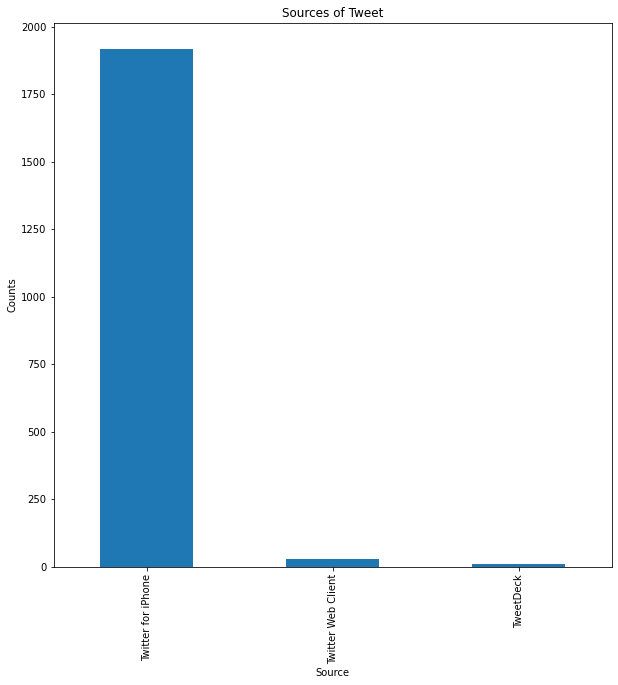

In [85]:
df['source'].value_counts().plot(kind = 'bar', figsize = (10,10))
plt.xlabel('Source')
plt.ylabel('Counts')
plt.title('Sources of Tweet');

In [78]:
total= 1918 +27+11
print(1918/total)
print(27/total)
print(11/total)

0.9805725971370143
0.013803680981595092
0.005623721881390593


### It can be observed that the highest source of tweets were from the iphone (2019)

### Insights:
2. Is there a relationship between Retweet and favorites?

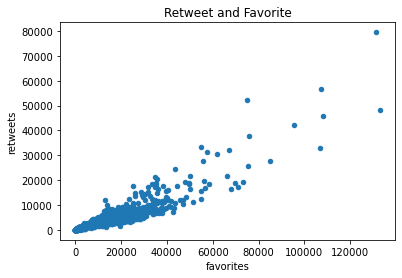

In [79]:
# Visualization

df.plot(x='favorites', y='retweets', kind='scatter', title = 'Retweet and Favorite');

### There is an observed positive relationship between favourites and retweets. 

### Insights:
3. What is the highest and lowest retweeted photo?

In [80]:
# Check the max value in retweet column and then locate that row
df.retweets.max()


79515

In [81]:
df.loc[df['retweets'] == 79515]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,dog_stage
768,744234799360020481,2016-06-18 18:26:18+00:00,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13.0,10,NaN,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1.0,...,True,ice_bear,0.044681,False,whippet,0.018442,True,131075,79515,doggo


In [82]:
 # Check the min value in retweet column and then locate that row
df.retweets.min()


16

In [83]:
df.loc[df['retweets'] == 16]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,dog_stage
1940,666102155909144576,2015-11-16 03:55:04+00:00,Twitter for iPhone,Oh my. Here you are seeing an Adobe Setter giv...,https://twitter.com/dog_rates/status/666102155...,11.0,10,NaN,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg,1.0,...,True,newfoundland,0.149842,True,borzoi,0.133649,True,81,16,None



The tweet_id 744234799360020481 is the most retweeted (83727 retweets). This tweet is an image of a dog realizing he can stand in the pool.  Again, the lowerest retweeted image is the tweet_id 666102155909144576 (16 retweets). This is an image: Oh my. Here you are seeing an Adobe Setter giv...

